In [1]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# use pandas to load data into a DataFrame
df = pd.read_csv("datasets/train.csv")
df_test = pd.read_csv("datasets/test.csv")
print(df.shape) # (rows, columns)
print(df_test.shape)

(35973, 40)
(11990, 39)


In [4]:
target_column = 'DC201'

In [3]:
df.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum


In [7]:
df[target_column].replace(to_replace={'Layak Minum':1, 'Tidak Layak Minum':0}, inplace=True)

In [8]:
# Potability is the target variable, how many of each class are there?
df[target_column].value_counts()

DC201
1.0    32398
0.0     3572
Name: count, dtype: int64

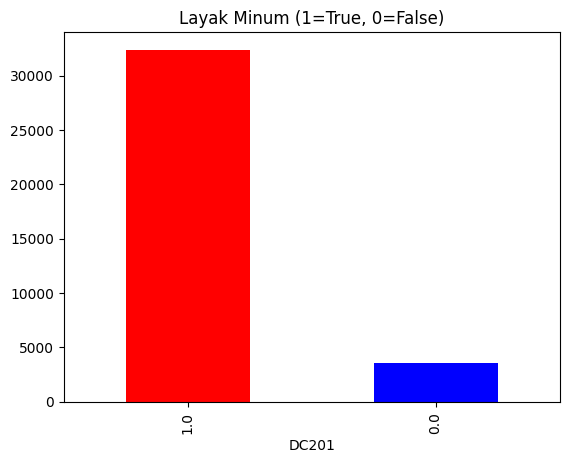

In [9]:
df[target_column].value_counts().plot(kind="bar", color=["red", "blue"], title = "Layak Minum (1=True, 0=False)");

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      35973 non-null  int64  
 1   DC024   35973 non-null  int64  
 2   DC025   35973 non-null  int64  
 3   DC205   35962 non-null  float64
 4   DC206   35952 non-null  float64
 5   DC207   35929 non-null  float64
 6   DC208   35960 non-null  float64
 7   DC209   35955 non-null  float64
 8   DC210   35932 non-null  float64
 9   DC211   35949 non-null  float64
 10  DC212   35949 non-null  float64
 11  DC213   35896 non-null  float64
 12  DC214   35964 non-null  float64
 13  DC215   35959 non-null  float64
 14  DC216   35934 non-null  float64
 15  DC217   35973 non-null  int64  
 16  DC219   35973 non-null  int64  
 17  DC220   35969 non-null  float64
 18  DC226   35967 non-null  float64
 19  DC230a  35962 non-null  float64
 20  DC230b  32964 non-null  float64
 21  DC232   32949 non-null  float64
 22

In [11]:
df.describe() # bisa melihat variabel 'count' terkecil untuk mengetahui berapa banyak data yang NaN
# count terkecil terletak pada Sulfate 2945

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
count,35973.000000,35973.000000,35973.000000,35962.000000,35952.000000,35929.000000,35960.000000,35955.000000,35932.000000,35949.000000,...,35936.000000,35361.000000,30599.000000,35969.000000,35964.000000,35959.000000,35973.000000,35962.000000,35921.000000,35970.000000
mean,24336.069775,43.229088,1.468601,14.986736,0.960086,0.189234,0.846858,0.569434,0.326700,0.758547,...,0.198687,1.167303,0.826922,0.366288,0.379574,1.207014,2.699330,15.498637,82.668216,0.900695
std,13828.886872,23.585684,0.499020,6.061058,0.195761,0.391700,0.360130,0.495162,0.469013,0.427970,...,0.425478,0.457907,0.378320,0.481796,0.485288,1.228101,1.435673,9.598043,91.194377,0.299075
min,1.000000,11.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000
25%,12341.000000,31.000000,1.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,42.000000,1.000000
50%,24787.000000,35.000000,1.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,11.000000,63.000000,1.000000
75%,36131.000000,64.000000,2.000000,16.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,96.000000,1.000000
max,47963.000000,94.000000,2.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,6.000000,1.000000,1.000000,1.000000,4.000000,5.000000,96.000000,998.000000,1.000000


In [12]:
df.isna().sum() # dari sini juga terlihat

id            0
DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10446
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         3
dtype: int64

### klasifikasi akan susah dilakukan jika box plot mirip. Contoh boxplot yang bagus adalah iris dataset.
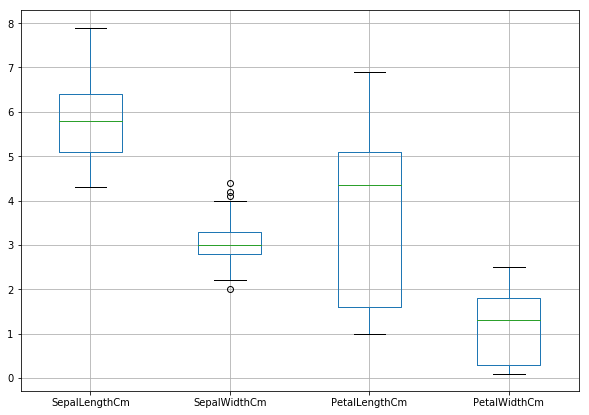

In [13]:
column_list = list(df.columns)
column_list = column_list[:-1]
column_list

['id',
 'DC024',
 'DC025',
 'DC205',
 'DC206',
 'DC207',
 'DC208',
 'DC209',
 'DC210',
 'DC211',
 'DC212',
 'DC213',
 'DC214',
 'DC215',
 'DC216',
 'DC217',
 'DC219',
 'DC220',
 'DC226',
 'DC230a',
 'DC230b',
 'DC232',
 'DC232b',
 'DC235',
 'DC237',
 'DC237a',
 'DC237b',
 'DC237c',
 'DC237d',
 'DC237e',
 'DC237f',
 'DC241',
 'DC242',
 'DC244',
 'DC246',
 'DC252',
 'DC270a',
 'DC109',
 'DC142a']

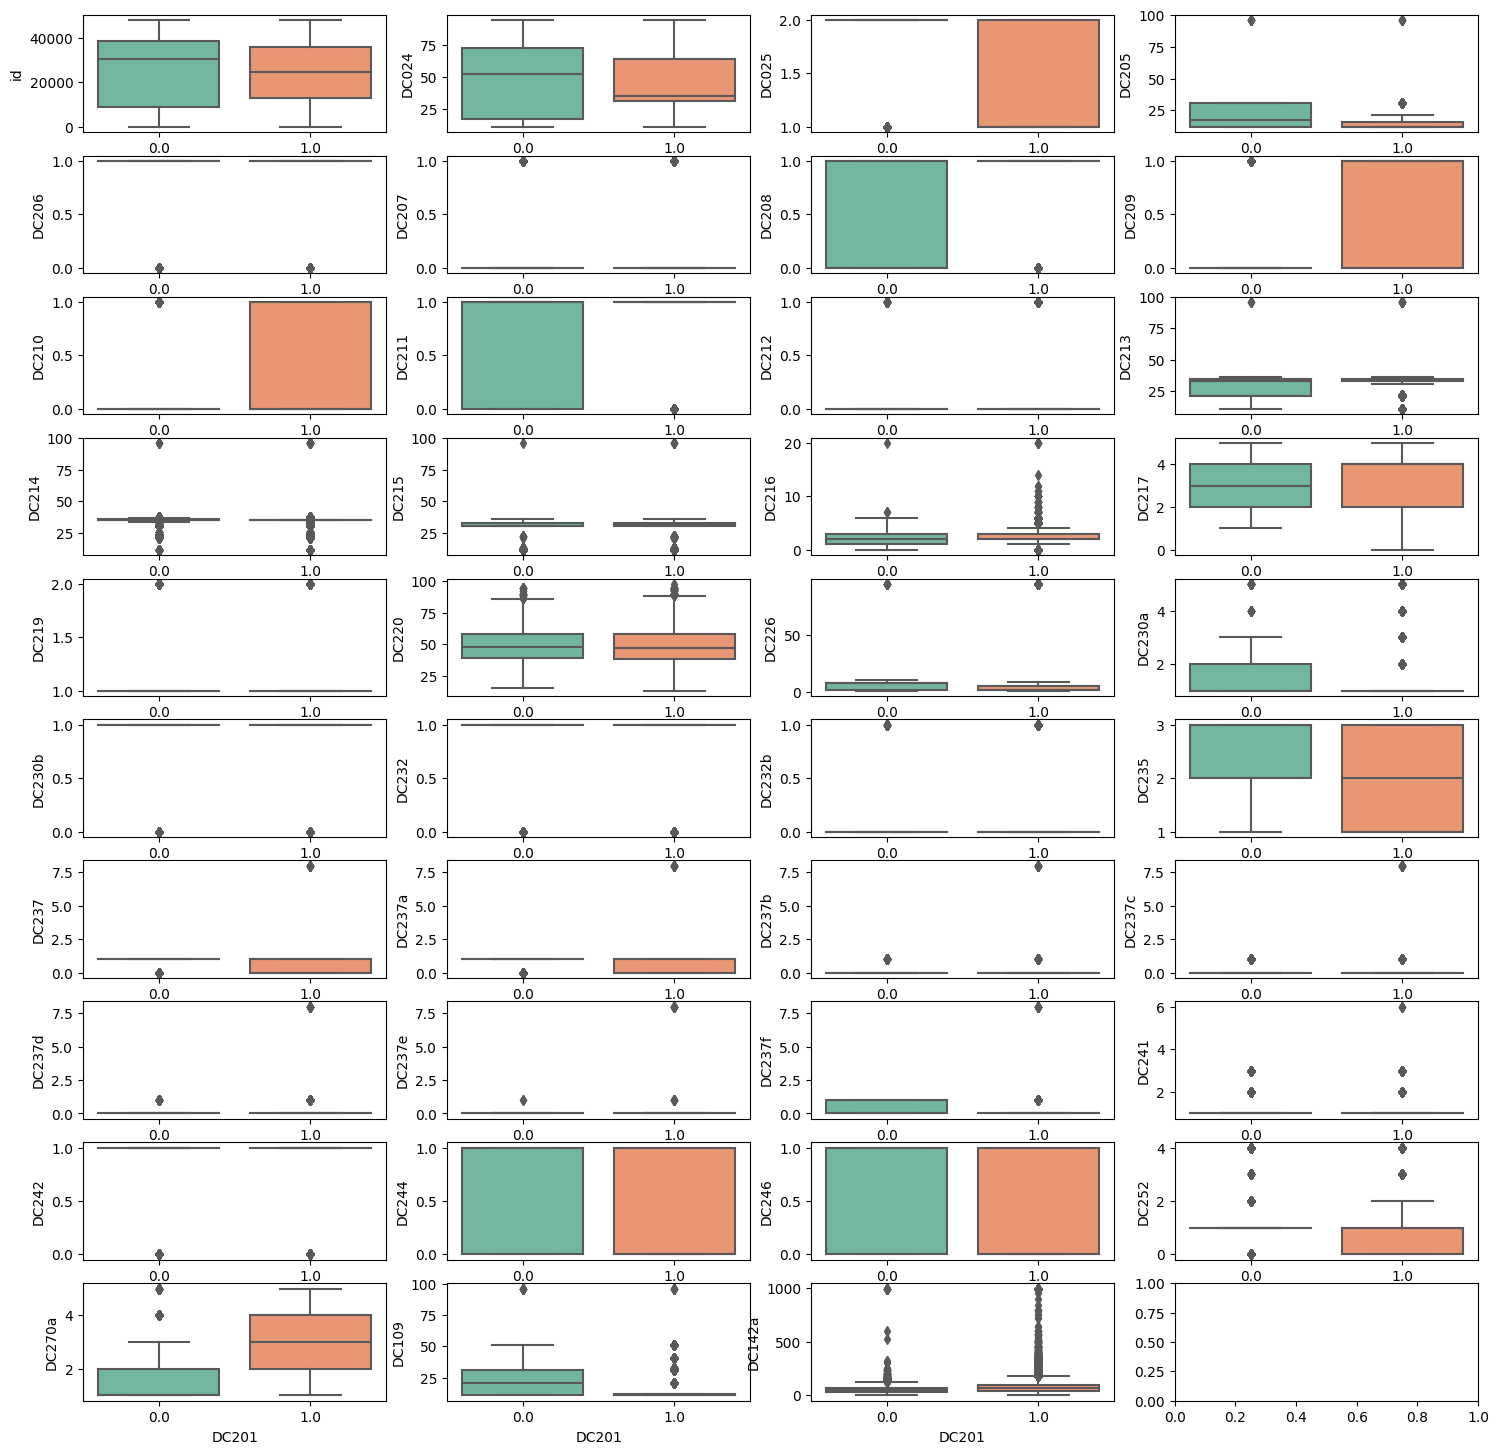

In [15]:
row, col = 10, 4
fig, axes = plt.subplots(row, col, figsize=(18, 18))
i, j = 0, 0
for z, column in enumerate(column_list):
    sns.boxplot(ax=axes[i,j], data=df, palette="Set2", x=target_column, y=column_list[z])
    if j == col-1:
        j = 0
        i += 1
    else:
        j += 1

### Distribusi data setiap fitur dengan histograms

In [16]:
target_list = df[target_column].value_counts()
target_list = target_list.index.tolist()
target_list

[1.0, 0.0]

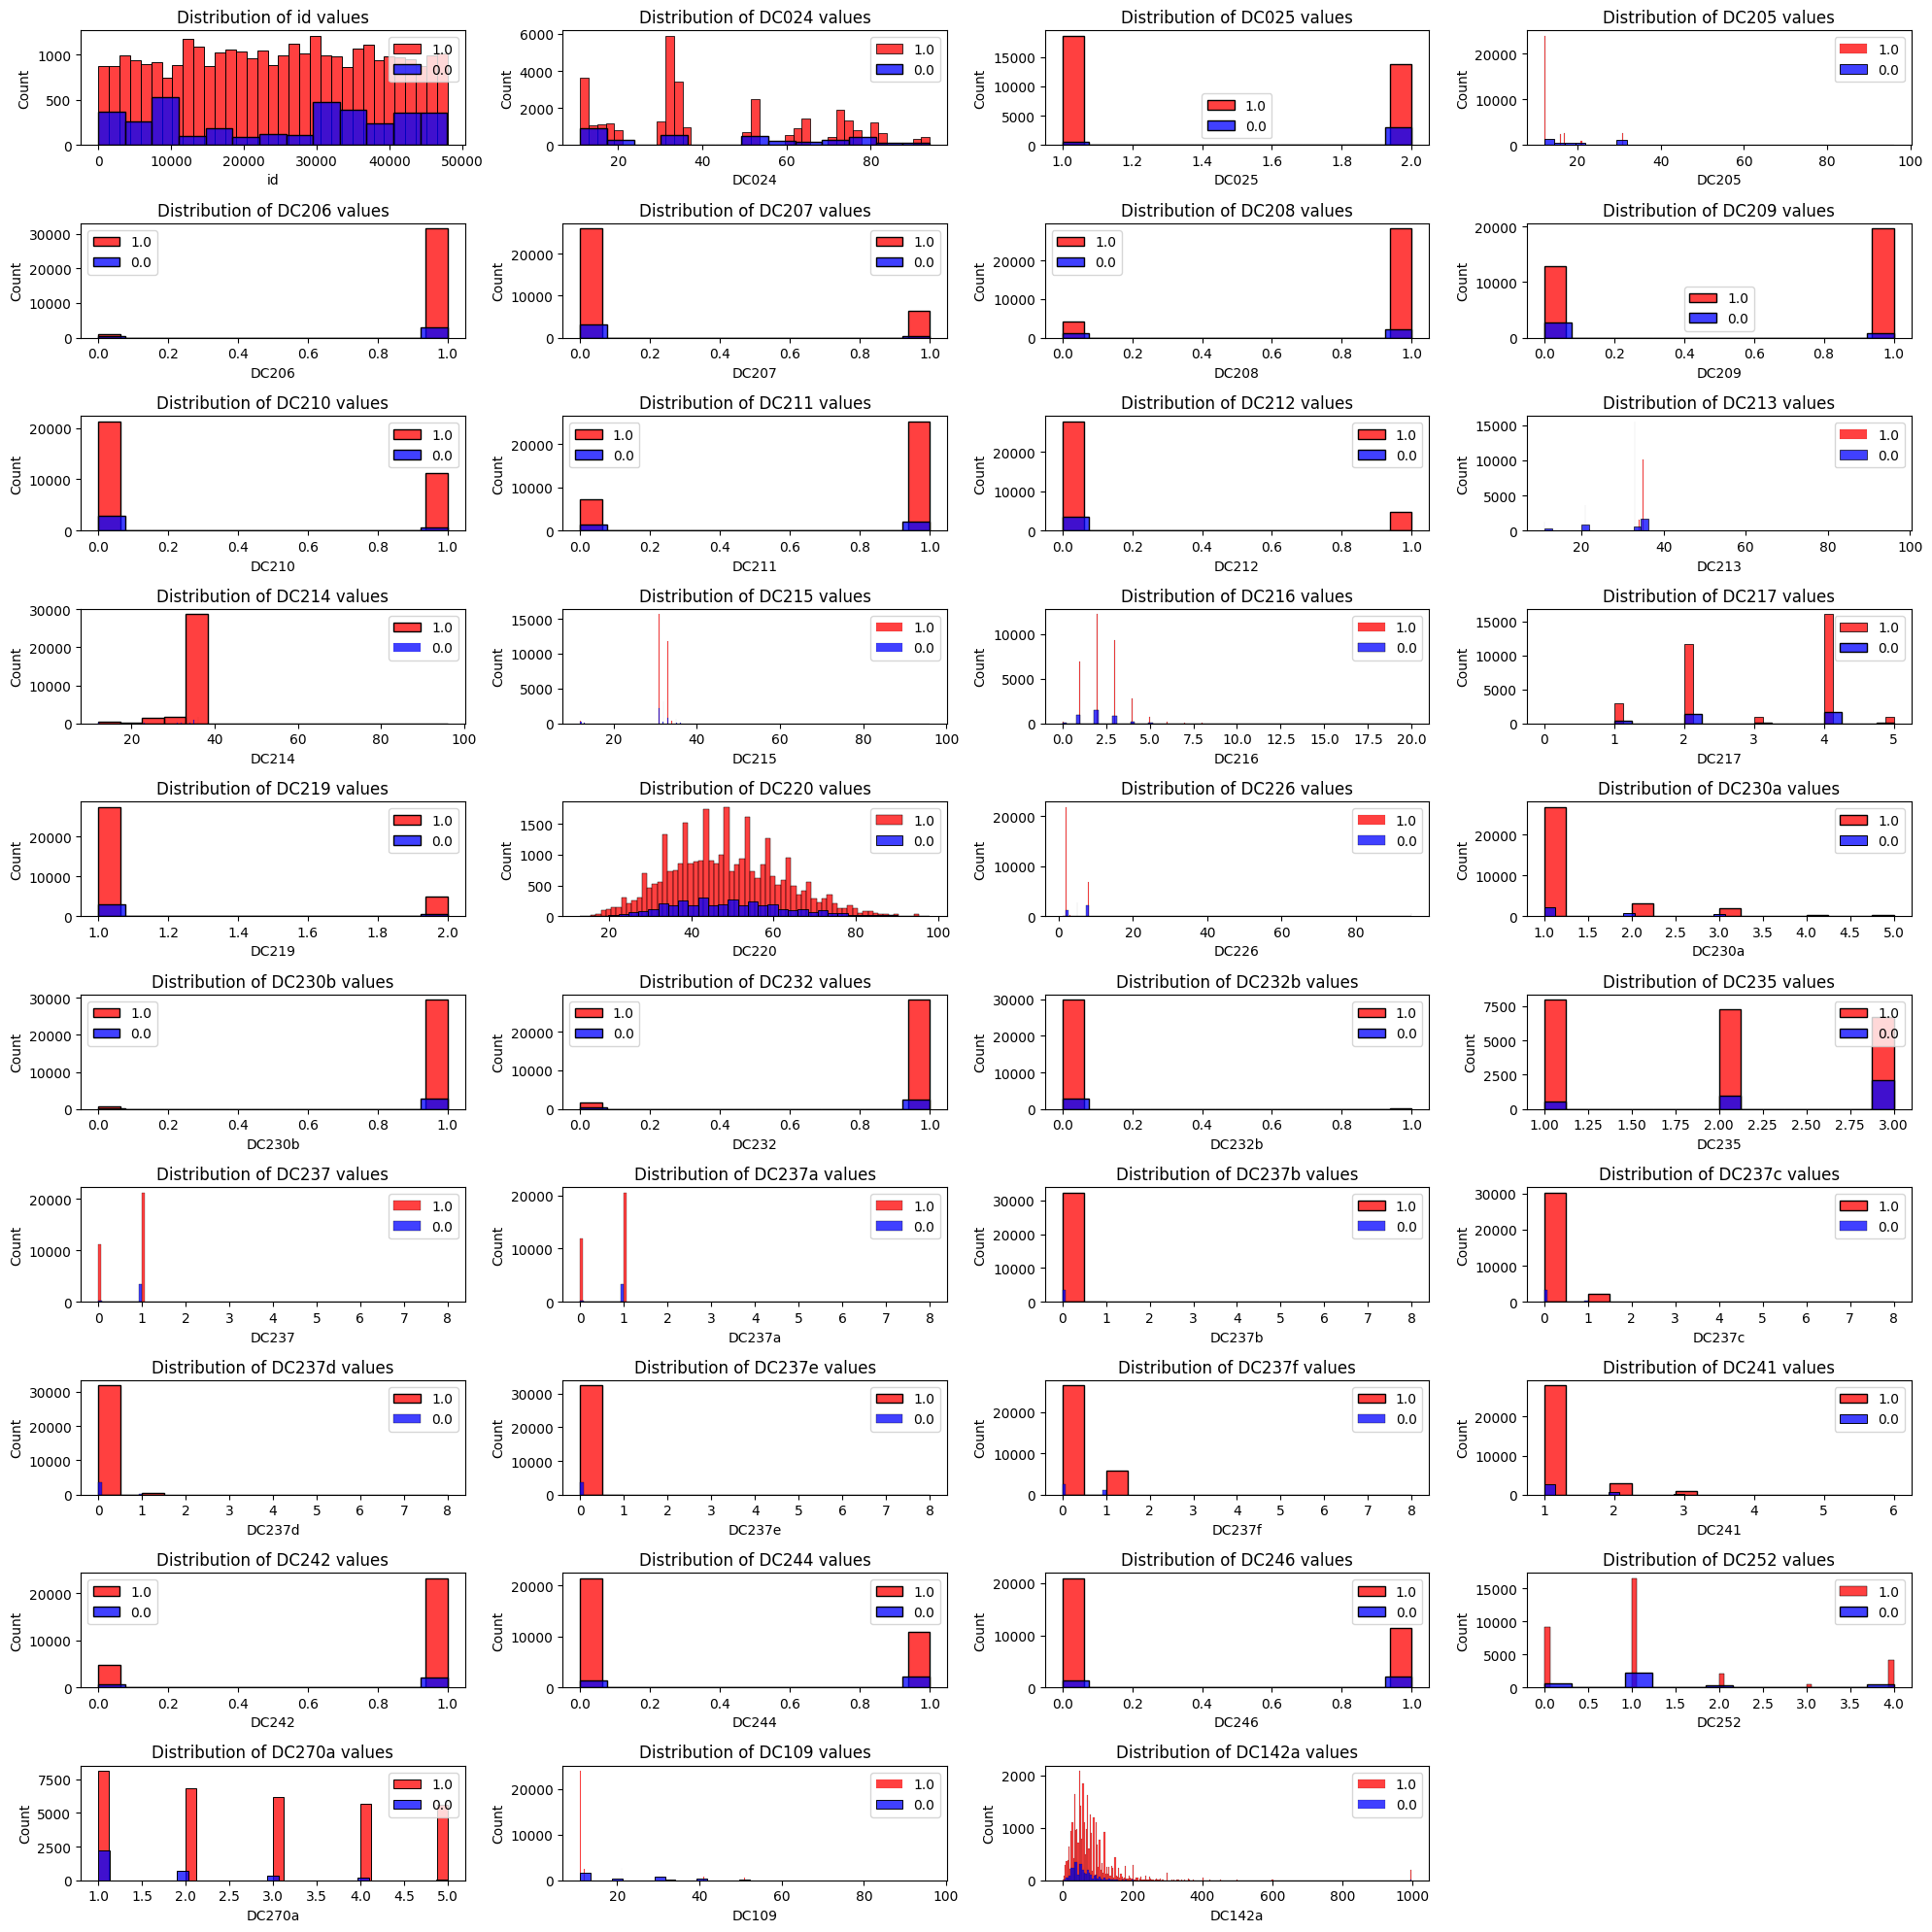

In [24]:
# Distribution of features

target_value = []

for target in target_list:
    query = str(target_column) + ' == ' + str(target)
    target_value.append(df.query(query))

# colors = ['salmon', 'red', 'blue', 'lightblue', 'orange', 'black', 'gray', 'pink', 'navy', 'white']
colors = ['red', 'blue']

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:39]):
    plt.subplot(10,4,ax+1)
    plt.title(f'Distribution of {column} values')
    for i, target in enumerate(target_value):
        sns.histplot(x=target[column],label=target_list[i], color=colors[i])    
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

In [25]:
sns.pairplot(df, hue=target_column)

: 

: 

### Correlation Matrix

- apakah variable punya ketergantungan atau tidak
- Kalo korelasinya 1: berkorelasi, negatif: tidak ada korelasinya 
- BAGUS KALO POSITIF ATAU NEGATIF, KALO 0 → tidak ada korelasinya

#### Correlation Matrix yang baik

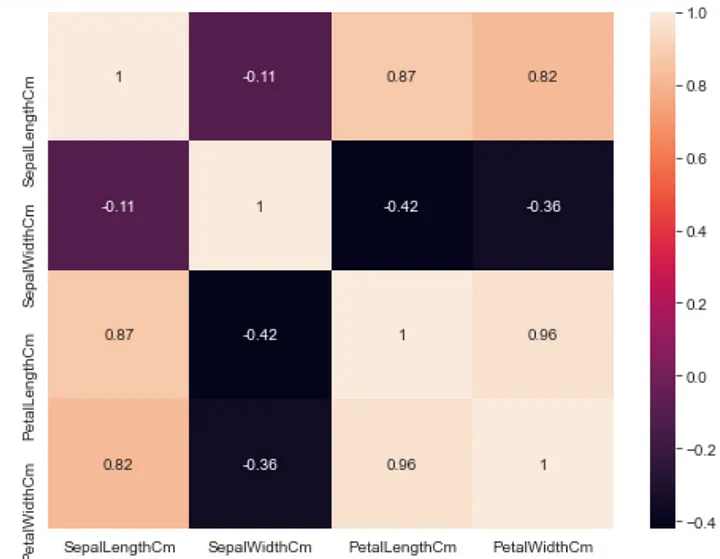

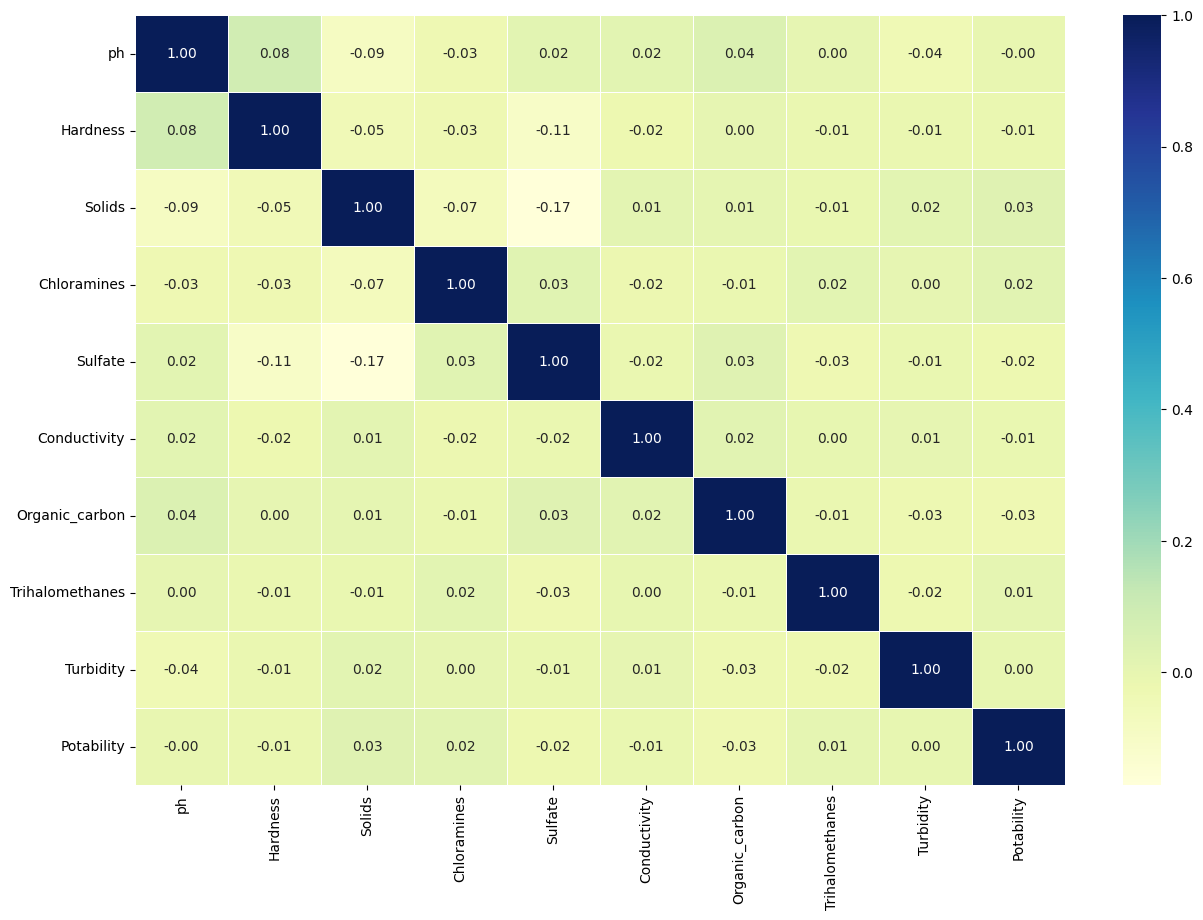

In [ ]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");